In [3]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict


In [4]:
#toplevelpath = "/Users/kavyaub/Documents/mySubjects/ConEdison"
toplevelpath = "/Users/aya/Documents/code-pfs/gas-nx"

all_datadir = "/NYU_LeakData"

def ask_user_path(pathinput, datadirinput):
    ask_user_path_text = 'FilePath for Data is: ' + pathinput + datadirinput + ' OK? y / n '
    response = 'y'
    user_inputYN = input(ask_user_path_text)
    if user_inputYN.lower() not in response:
        new_input = 'PASTE FULL PATH TO YOUR DATA DIRECTORY HERE: '
        newpath = input(new_input)
        return newpath
    elif user_inputYN in response:
        response2 = pathinput + datadirinput
        return response2

#datadirpath = ask_user_path(toplevelpath, all_datadir)
get_file_datadirpath = ask_user_path(toplevelpath, all_datadir)


FilePath for Data is: /Users/aya/Documents/code-pfs/gas-nx/NYU_LeakData OK? y / n y


In [13]:
def get_file(name):
    anomaly = get_file_datadirpath+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [17]:

anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nodeArr=pd.read_csv(anomalyFreeNode)

anomalyFree = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes_Leak1.csv"
nFile1=pd.read_csv(anomaly)


anomalyFree = "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nFile0=pd.read_excel(anomalyFree)

anomaly = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
nFile1=pd.read_excel(anomaly)

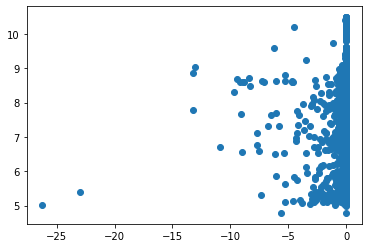

In [8]:
#for col in nFile1.columns:
#    print(col)
#NodeResultFlow
#NodePressure
plt.scatter(nFile1.NodeResultFlow, nFile1.NodePressure)

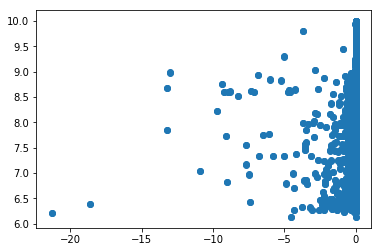

In [9]:
final1 = np.array(nFile0.NodeResultFlow)
finalArray1 = np.append(final1,nFile1.NodeResultFlow)
final2 = np.array(nFile0.NodePressure)
finalArray2 = np.append(final2,nFile1.NodePressure)
plt.scatter(finalArray1, finalArray2)

In [9]:
def pressDeviation(file0, file1):
    res_arr = file1
    res_arr['PressureDeviation']= file1.NodePressure
    res_arr['FlowDeviation']= file1.NodeResultFlow
    res_arr.FlowDeviation = abs(res_arr.NodeResultFlow.subtract(file0.NodeResultFlow))/file0.NodeResultFlow
    res_arr.PressureDeviation = abs(res_arr.PressureDeviation.subtract(file0.NodePressure))/file0.NodePressure
    return res_arr

In [22]:
preDir = "/LeakData_ZeroDegrees/"
name0_11="NYU Anamoly Data_ZeroDeg_Nodes_Leak11"
name0_21="NYU Anamoly Data_ZeroDeg_Nodes_Leak21"
name0_31="NYU Anamoly Data_ZeroDeg_Nodes_Leak31"
name0_41="NYU Anamoly Data_ZeroDeg_Nodes_Leak41"
filetype = ".csv"

leak11 = get_file(preDir+name0_11+filetype)
leak21 = get_file(preDir+name0_21+filetype)
leak31 = get_file(preDir+name0_31+filetype)
leak41 = get_file(preDir+name0_41+filetype)

/Users/aya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [23]:
res1 = pressDeviation(nFile0,nFile1)
res11 = pressDeviation(nFile0,leak11)
res21 = pressDeviation(nFile0,leak21)
res31 = pressDeviation(nFile0,leak31)
res41 = pressDeviation(nFile0,leak41)

In [24]:
max(res41.PressureDeviation)

0.25716027973630223

In [25]:
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes.csv"
name32_01="NYU Anamoly Data_32Deg_Nodes_Leak1.csv"
name32_11="NYU Anamoly Data_32Deg_Nodes_Leak11.csv"
name32_21="NYU Anamoly Data_32Deg_Nodes_Leak21.csv"
name32_31="NYU Anamoly Data_32Deg_Nodes_Leak31.csv"
name32_41="NYU Anamoly Data_32Deg_Nodes_Leak41.csv"

leak32_00 = get_file(preDir+leakFree32)
leak32_01 = get_file(preDir+name32_01)
leak32_11 = get_file(preDir+name32_11)
leak32_21 = get_file(preDir+name32_21)
leak32_31 = get_file(preDir+name32_31)
leak32_41 = get_file(preDir+name32_41)

In [26]:
res32_1 = pressDeviation(leak32_00,leak32_01)
res32_11 = pressDeviation(leak32_00,leak32_11)
res32_21 = pressDeviation(leak32_00,leak32_21)
res32_31 = pressDeviation(leak32_00,leak32_31)
res32_41 = pressDeviation(leak32_00,leak32_41)

In [27]:
max(res32_41.PressureDeviation)


0.20106127588154304

0.08613399999999949

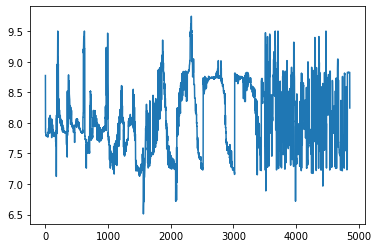

In [28]:
plt.plot(leak32_00.index, leak32_00.NodePressure)
leak32_00.NodePressure[3400] - leak32_41.NodePressure[3400]

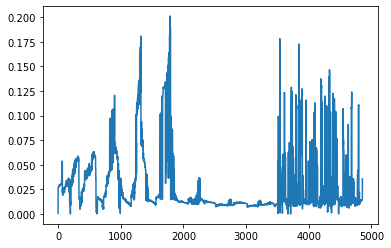

In [29]:
plt.plot(res32_41.index, res32_41.PressureDeviation)

(<matplotlib.collections.PathCollection at 0x10233cbcc0>,
 <matplotlib.collections.LineCollection at 0x10233cbd68>)

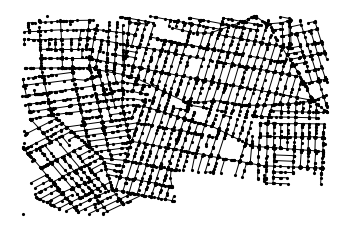

In [36]:
ppipes = "/Users/aya/Documents/NYU/ConEdison Leak Detection/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes_Leak1.csv"
pipesdf0 = pd.read_csv(ppipes)

#for i, name in enumerate(pipesdf0.columns):
#    print(i+1, name)

pos_dict = defaultdict(list)
for i, j, k in zip(res41.NAME,res41.NodeXCoordinate,res41.NodeYCoordinate):
    pos_dict[i].append(j)
    pos_dict[i].append(k)
pos_dict0 = dict(pos_dict)

winter = wn.network.WaterNetworkModel()

node_list = list(res41.NAME)
for i in node_list:
    winter.add_junction(name = i, base_demand=10, demand_pattern='1', elevation=0, coordinates=pos_dict0[i])

for i, label in enumerate(pipesdf0['NAME']):
    pname = label
    pdest = pipesdf0['FacilityToNodeName'].iloc[i]
    psource = pipesdf0['FacilityFromNodeName'].iloc[i]
    plen = pipesdf0['PipeLength'].iloc[i]
    pdia = pipesdf0['PipeDiameter'].iloc[i]
    prough = pipesdf0['PipeRoughness'].iloc[i]
    winter.add_pipe(name = pname, start_node_name=psource, end_node_name=pdest, length=plen, diameter=pdia, roughness=prough, minor_loss=0)

node_attribute=dict(res41.PressureDeviation)

initial_node_values = res41.iloc[0,:]

nodelist,nodecolor = zip(*node_attribute.items())
node_range=[0,0]
node_range[0] = min(res41.PressureDeviation)
node_range[1] = max(res41.PressureDeviation)


wn.graphics.plot_network(winter,node_range=node_range,node_cmap=plt.cm.RdBu,add_colorbar=True,link_width=1,node_size = 10)


In [21]:
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes.csv"
name48_01="NYU Anamoly Data_48Deg_Nodes_Leak1.csv"
name48_11="NYU Anamoly Data_48Deg_Nodes_Leak11.csv"
name48_21="NYU Anamoly Data_48Deg_Nodes_Leak21.csv"
name48_31="NYU Anamoly Data_48Deg_Nodes_Leak31.csv"
name48_41="NYU Anamoly Data_48Deg_Nodes_Leak41.csv"

leak48_00 = get_file(preDir+leakFree48)
leak48_01 = get_file(preDir+name48_01)
leak48_11 = get_file(preDir+name48_11)
leak48_21 = get_file(preDir+name48_21)
leak48_31 = get_file(preDir+name48_31)
leak48_41 = get_file(preDir+name48_41)

res48_1 = pressDeviation(leak48_00,leak48_01)
res48_11 = pressDeviation(leak48_00,leak48_11)
res48_21 = pressDeviation(leak48_00,leak48_21)
res48_31 = pressDeviation(leak48_00,leak48_31)
res48_41 = pressDeviation(leak48_00,leak48_41)

In [22]:
max(res48_41.PressureDeviation)

0.19485525689950706

In [23]:
preDir = "/LeakData_64Degrees/"
leakFree48 = "NYU Anamoly Data_64Deg_Nodes.csv"
name64_01="NYU Anamoly Data_64Deg_Nodes_Leak1.csv"
name64_11="NYU Anamoly Data_64Deg_Nodes_Leak11.csv"
name64_21="NYU Anamoly Data_64Deg_Nodes_Leak21.csv"
name64_31="NYU Anamoly Data_64Deg_Nodes_Leak31.csv"
name64_41="NYU Anamoly Data_64Deg_Nodes_Leak41.csv"

leak64_00 = get_file(preDir+leakFree48)
leak64_01 = get_file(preDir+name64_01)
leak64_11 = get_file(preDir+name64_11)
leak64_21 = get_file(preDir+name64_21)
leak64_31 = get_file(preDir+name64_31)
leak64_41 = get_file(preDir+name64_41)

res64_1 = pressDeviation(leak64_00,leak64_01)
res64_11 = pressDeviation(leak64_00,leak64_11)
res64_21 = pressDeviation(leak64_00,leak64_21)
res64_31 = pressDeviation(leak64_00,leak64_31)
res64_41 = pressDeviation(leak64_00,leak64_41)

In [24]:
max(res64_41.PressureDeviation)

0.1929249720229879

In [25]:
preDir = "/LeakData_ZeroDegrees/"
leakFree48 = "NYU Anamoly Data_ZeroDeg_Nodes.csv"
name0_01="NYU Anamoly Data_ZeroDeg_Nodes_Leak1.csv"
name0_11="NYU Anamoly Data_ZeroDeg_Nodes_Leak11.csv"
name0_21="NYU Anamoly Data_ZeroDeg_Nodes_Leak21.csv"
name0_31="NYU Anamoly Data_ZeroDeg_Nodes_Leak31.csv"
name0_41="NYU Anamoly Data_ZeroDeg_Nodes_Leak41.csv"

leak0_00 = get_file(preDir+leakFree48)
leak0_01 = get_file(preDir+name0_01)
leak0_11 = get_file(preDir+name0_11)
leak0_21 = get_file(preDir+name0_21)
leak0_31 = get_file(preDir+name0_31)
leak0_41 = get_file(preDir+name0_41)

res0_1 = pressDeviation(leak0_00,leak0_01)
res0_11 = pressDeviation(leak0_00,leak0_11)
res0_21 = pressDeviation(leak0_00,leak0_21)
res0_31 = pressDeviation(leak0_00,leak0_31)
res0_41 = pressDeviation(leak0_00,leak0_41)

In [26]:
print(max(res0_1.PressureDeviation))
print(res0_1.iloc[1786]['NodePressure'])

0.00890501072389917
7.1517800000000005


In [27]:
print(max(res0_41.PressureDeviation))
print(res0_41.iloc[1786]['NodePressure'])

0.25716027973630223
5.3429720000000005


In [28]:
leak0_00.iloc[1786]['NodePressure']-leak0_01.iloc[1786]['NodePressure']

0.04085099999999908

In [29]:
#Araay of the max of all the deviations from 0 to 64 degrees

nodeLeak_1 = np.array([max(res0_1.PressureDeviation),max(res1.PressureDeviation),max(res32_1.PressureDeviation),max(res48_1.PressureDeviation),max(res64_1.PressureDeviation)])
nodeLeak_1


array([0.009, 0.005, 0.004, 0.004, 0.004])

In [30]:
nodeLeak_11 = np.array([max(res0_11.PressureDeviation),max(res11.PressureDeviation),max(res32_11.PressureDeviation),max(res48_11.PressureDeviation),max(res64_11.PressureDeviation)])
nodeLeak_11

array([0.064, 0.056, 0.05 , 0.048, 0.047])

In [31]:
nodeLeak_21 = [max(res0_21.PressureDeviation),max(res21.PressureDeviation),max(res32_21.PressureDeviation),max(res48_21.PressureDeviation),max(res64_21.PressureDeviation)]
nodeLeak_21

[0.12402443556467714,
 0.10801271405816118,
 0.09528028902075596,
 0.09161435564709283,
 0.08868819659340145]

In [32]:
nodeLeak_31 = np.array([max(res0_31.PressureDeviation),max(res31.PressureDeviation),max(res32_31.PressureDeviation),max(res48_31.PressureDeviation),max(res64_31.PressureDeviation)])
nodeLeak_31

array([0.185, 0.161, 0.143, 0.138, 0.135])

In [33]:
nodeLeak_41 = np.array([max(res0_41.PressureDeviation),max(res41.PressureDeviation),max(res32_41.PressureDeviation),max(res48_41.PressureDeviation),max(res64_41.PressureDeviation)])
nodeLeak_41

array([0.257, 0.226, 0.201, 0.195, 0.193])

In [34]:
nodeLeak_1-nodeLeak_41

array([-0.248, -0.22 , -0.197, -0.191, -0.189])

Text(0, 0.5, 'Temperature')

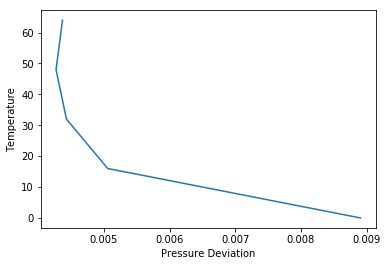

In [35]:
leakTemps=[0,16,32,48,64]

plt.plot(nodeLeak_1,leakTemps, label=['pressure Deviation','ttemperature'])
plt.xlabel('Pressure Deviation')
plt.ylabel('Temperature')


In [52]:
def draw_graph(graphArr):
    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    nodeinfo = nx.get_node_attributes(G, 'pressure')
    nodeinfo[cntrlnd]

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels[cntrlnd] = r'$\delta$'
    
    lower =0.0
    upper=0.3
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = pos_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = pos_dict0, nodelist=nodes, node_color=graphArr['PressureDeviation'], with_labels=False, node_size=25, cmap=cmap, vmin=0.0, vmax=0.3)
    lc = nx.draw_networkx_labels(G, pos = pos_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/press5.png")
    plt.show()

Current size: [30, 30]


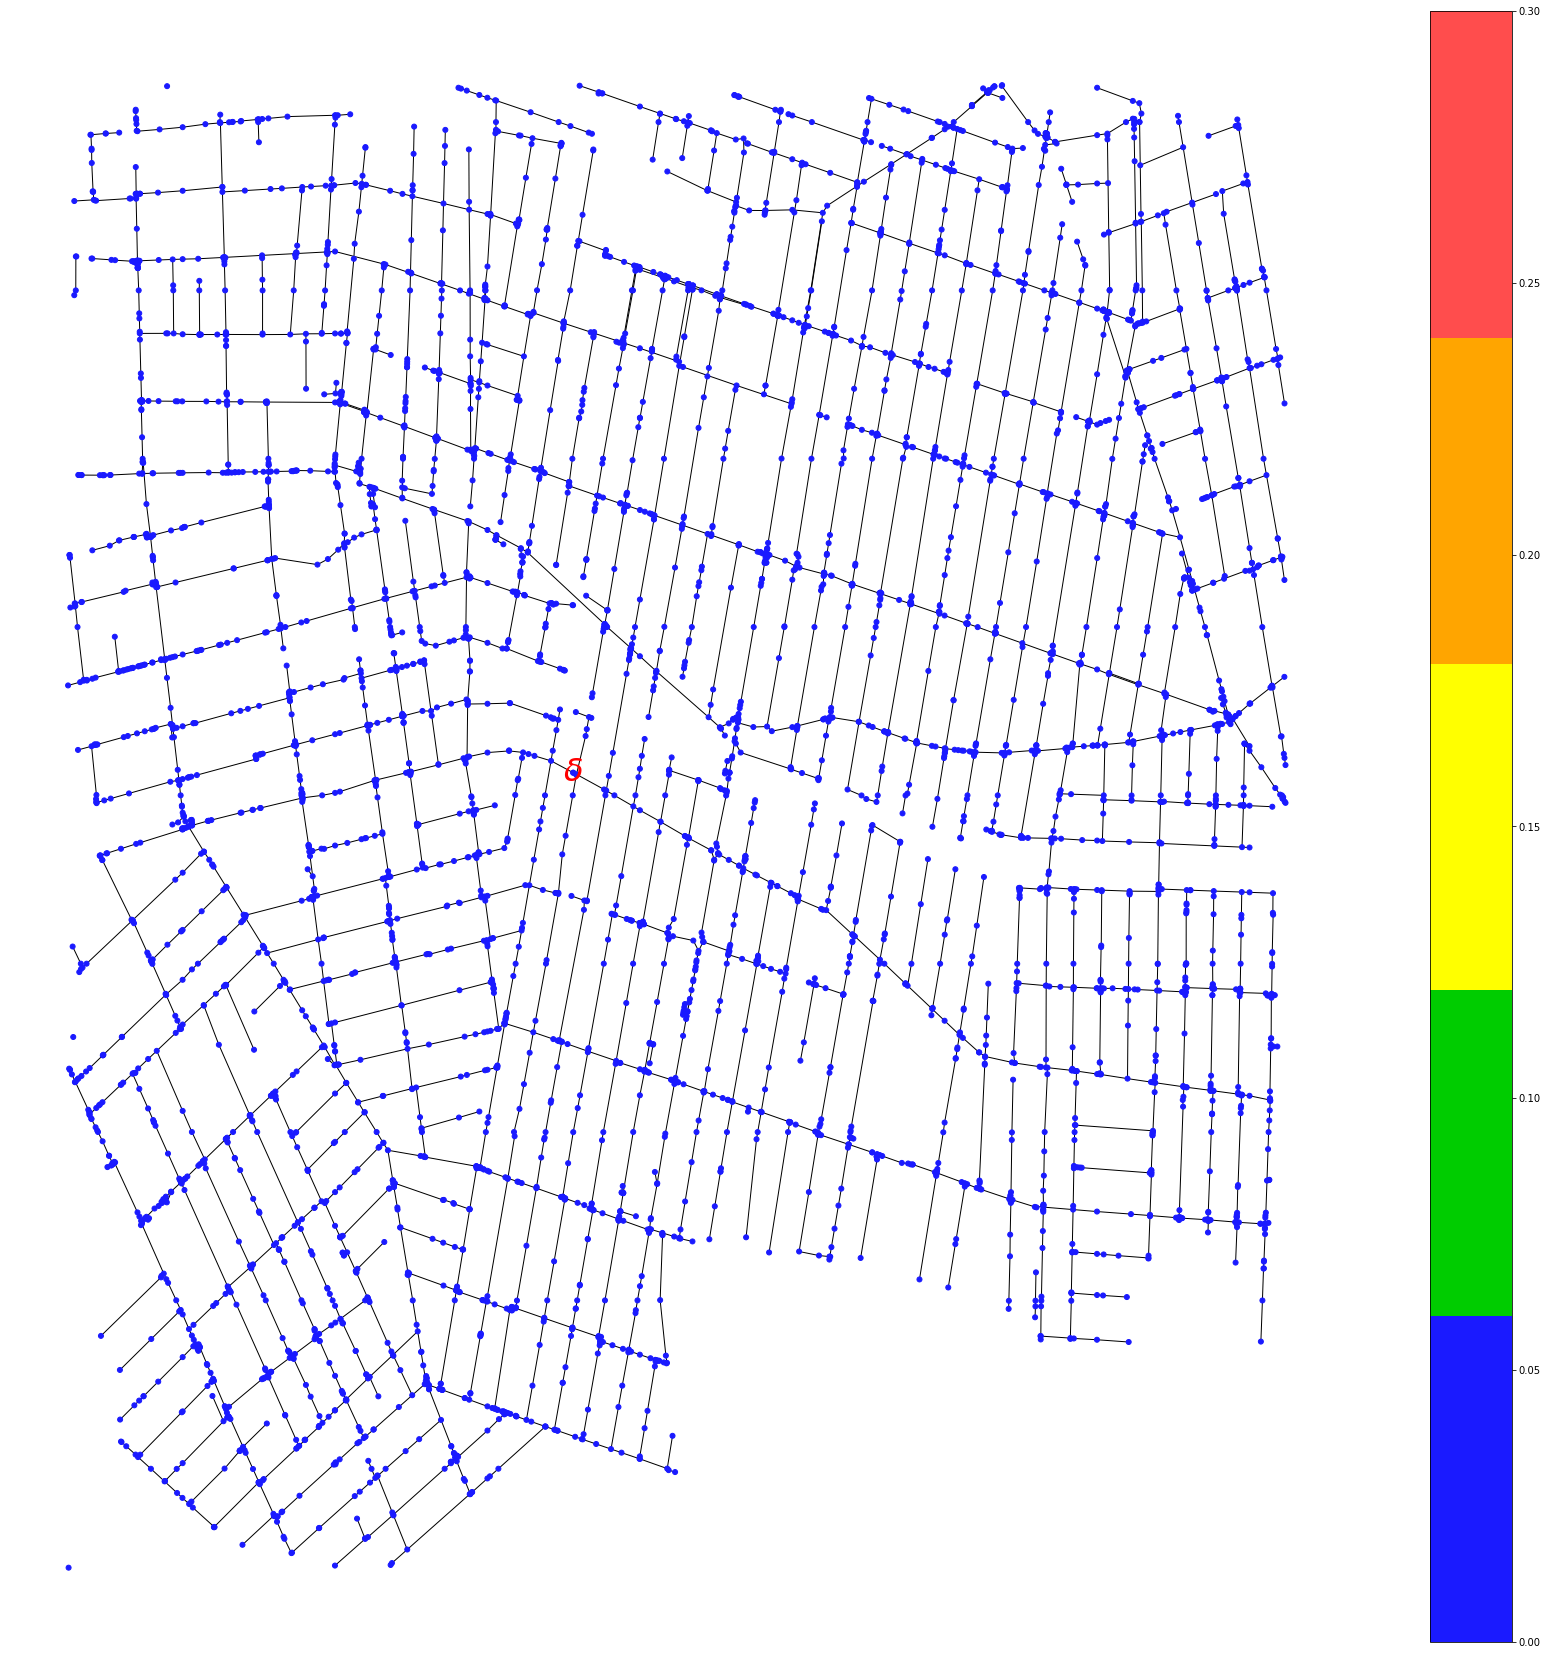

7.1517800000000005


In [45]:
#draw_graph(res41)
draw_graph(res0_1)
res0_1.iloc[1786]['PressureDeviation']
print(res0_1.iloc[1786]['NodePressure'])

Current size: [30, 30]


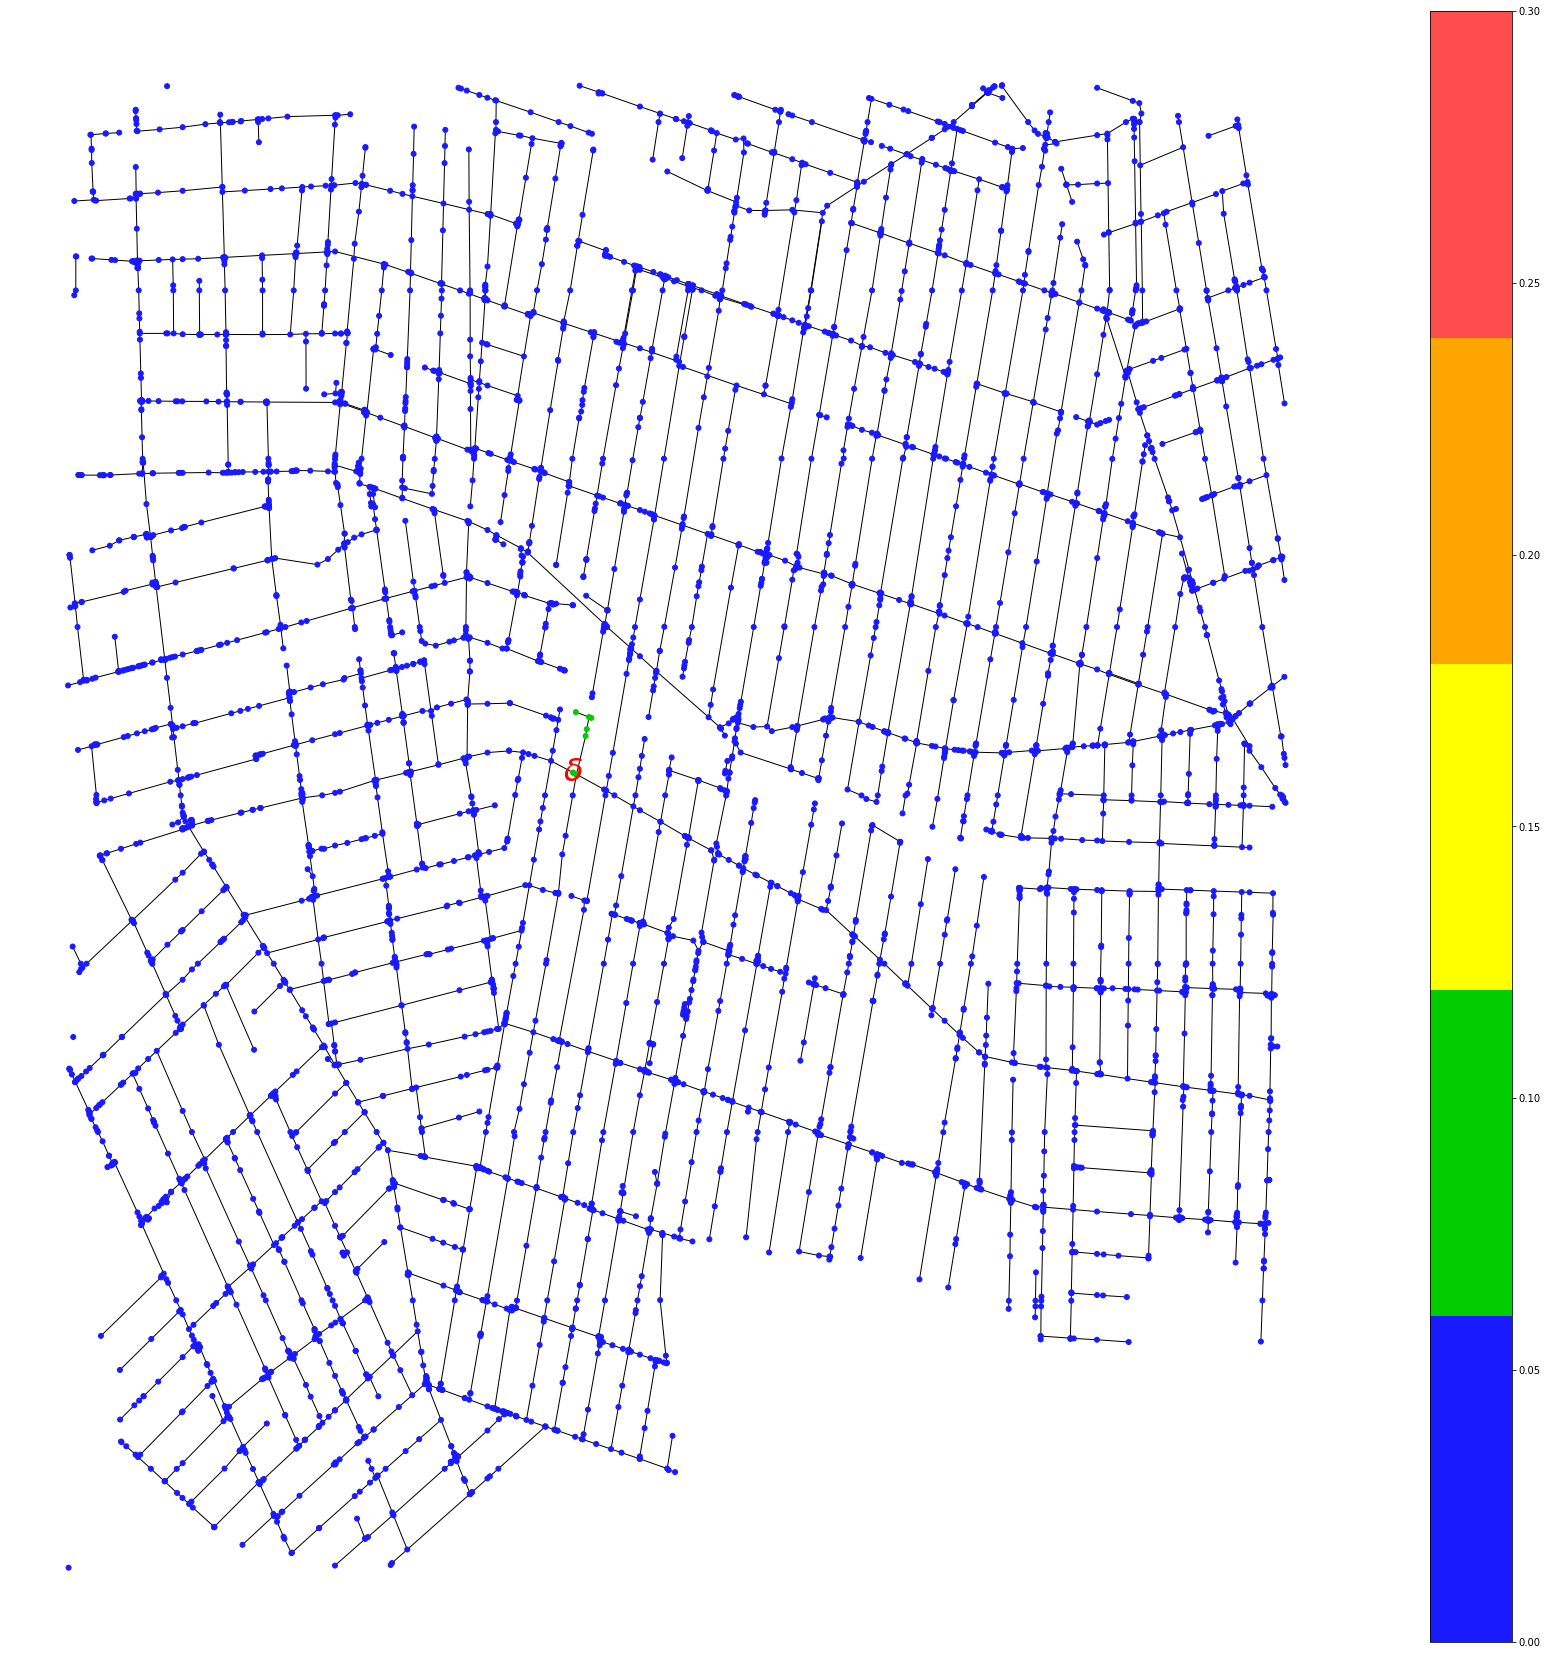

0.06423463124967765

In [47]:
draw_graph(res0_11)
res0_11.iloc[1786]['PressureDeviation']

Current size: [30, 30]


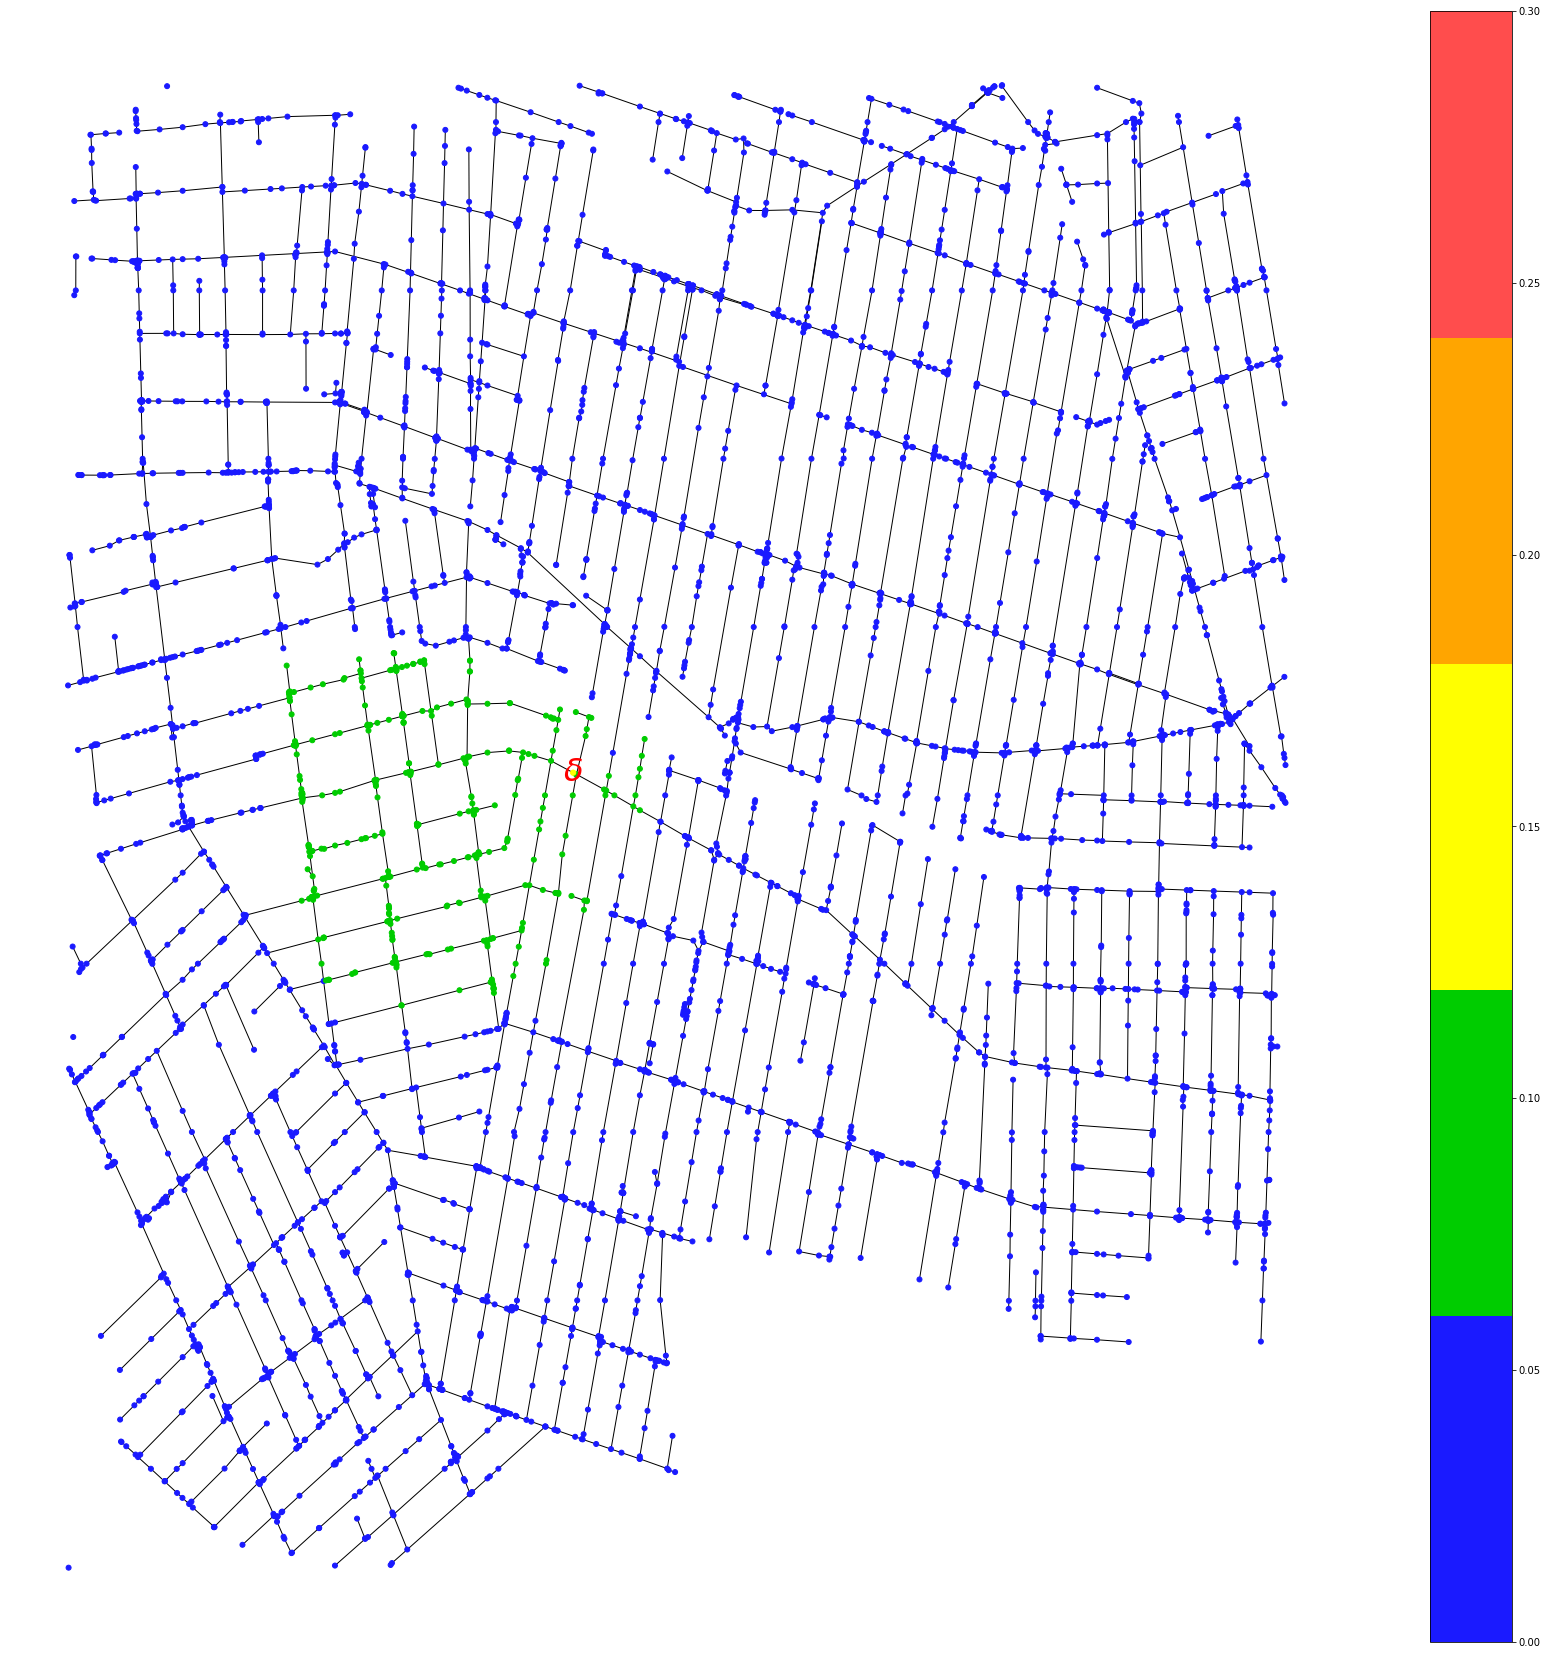

0.12402443556467714

In [49]:
draw_graph(res0_21)
res0_21.iloc[1786]['PressureDeviation']

Current size: [30, 30]


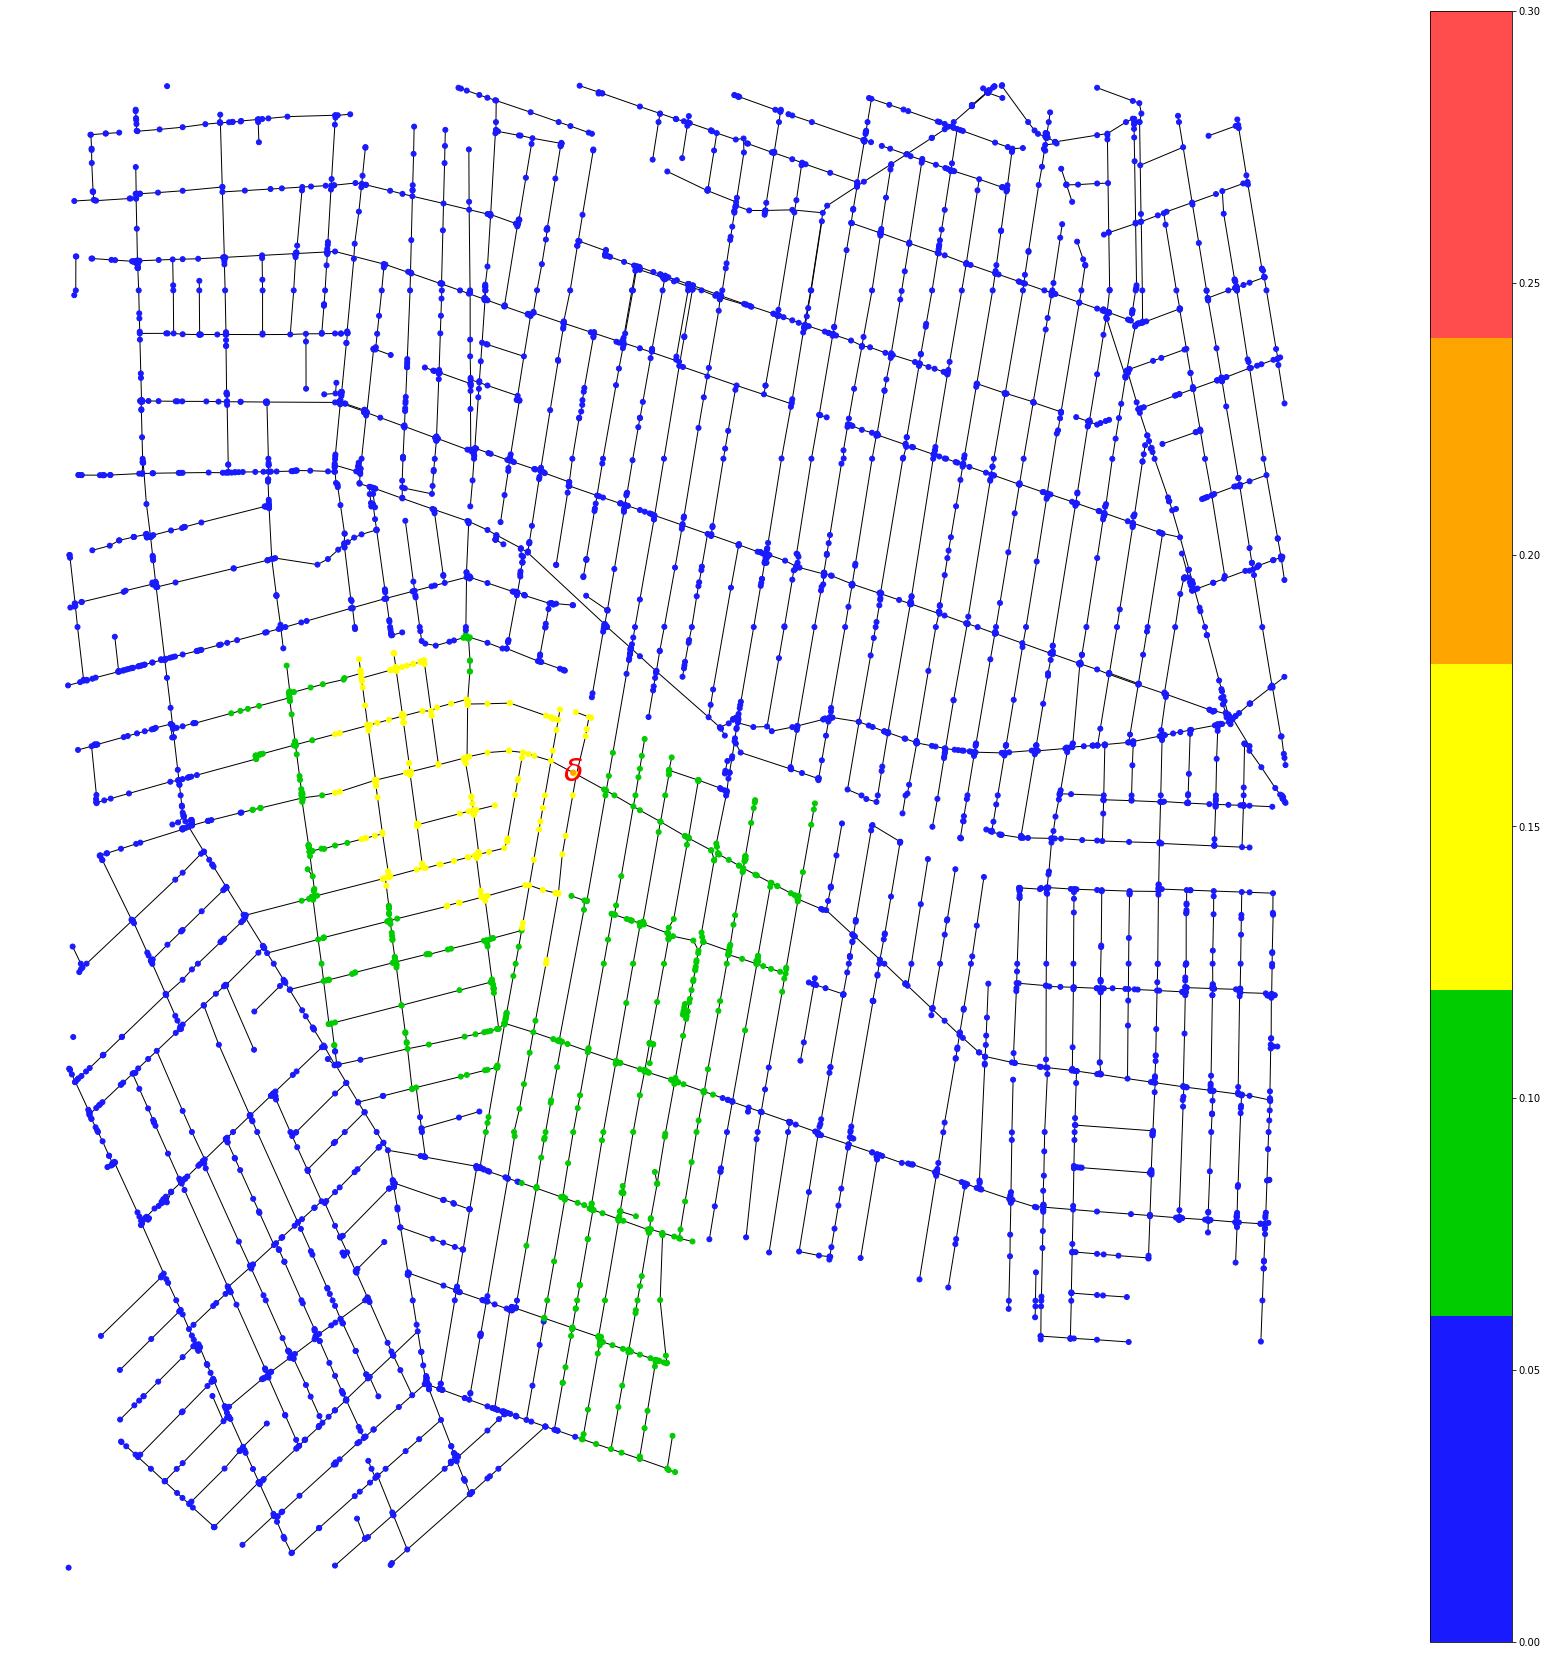

0.18471933288389183

In [51]:
draw_graph(res0_31)
res0_31.iloc[1786]['PressureDeviation']

Current size: [30, 30]


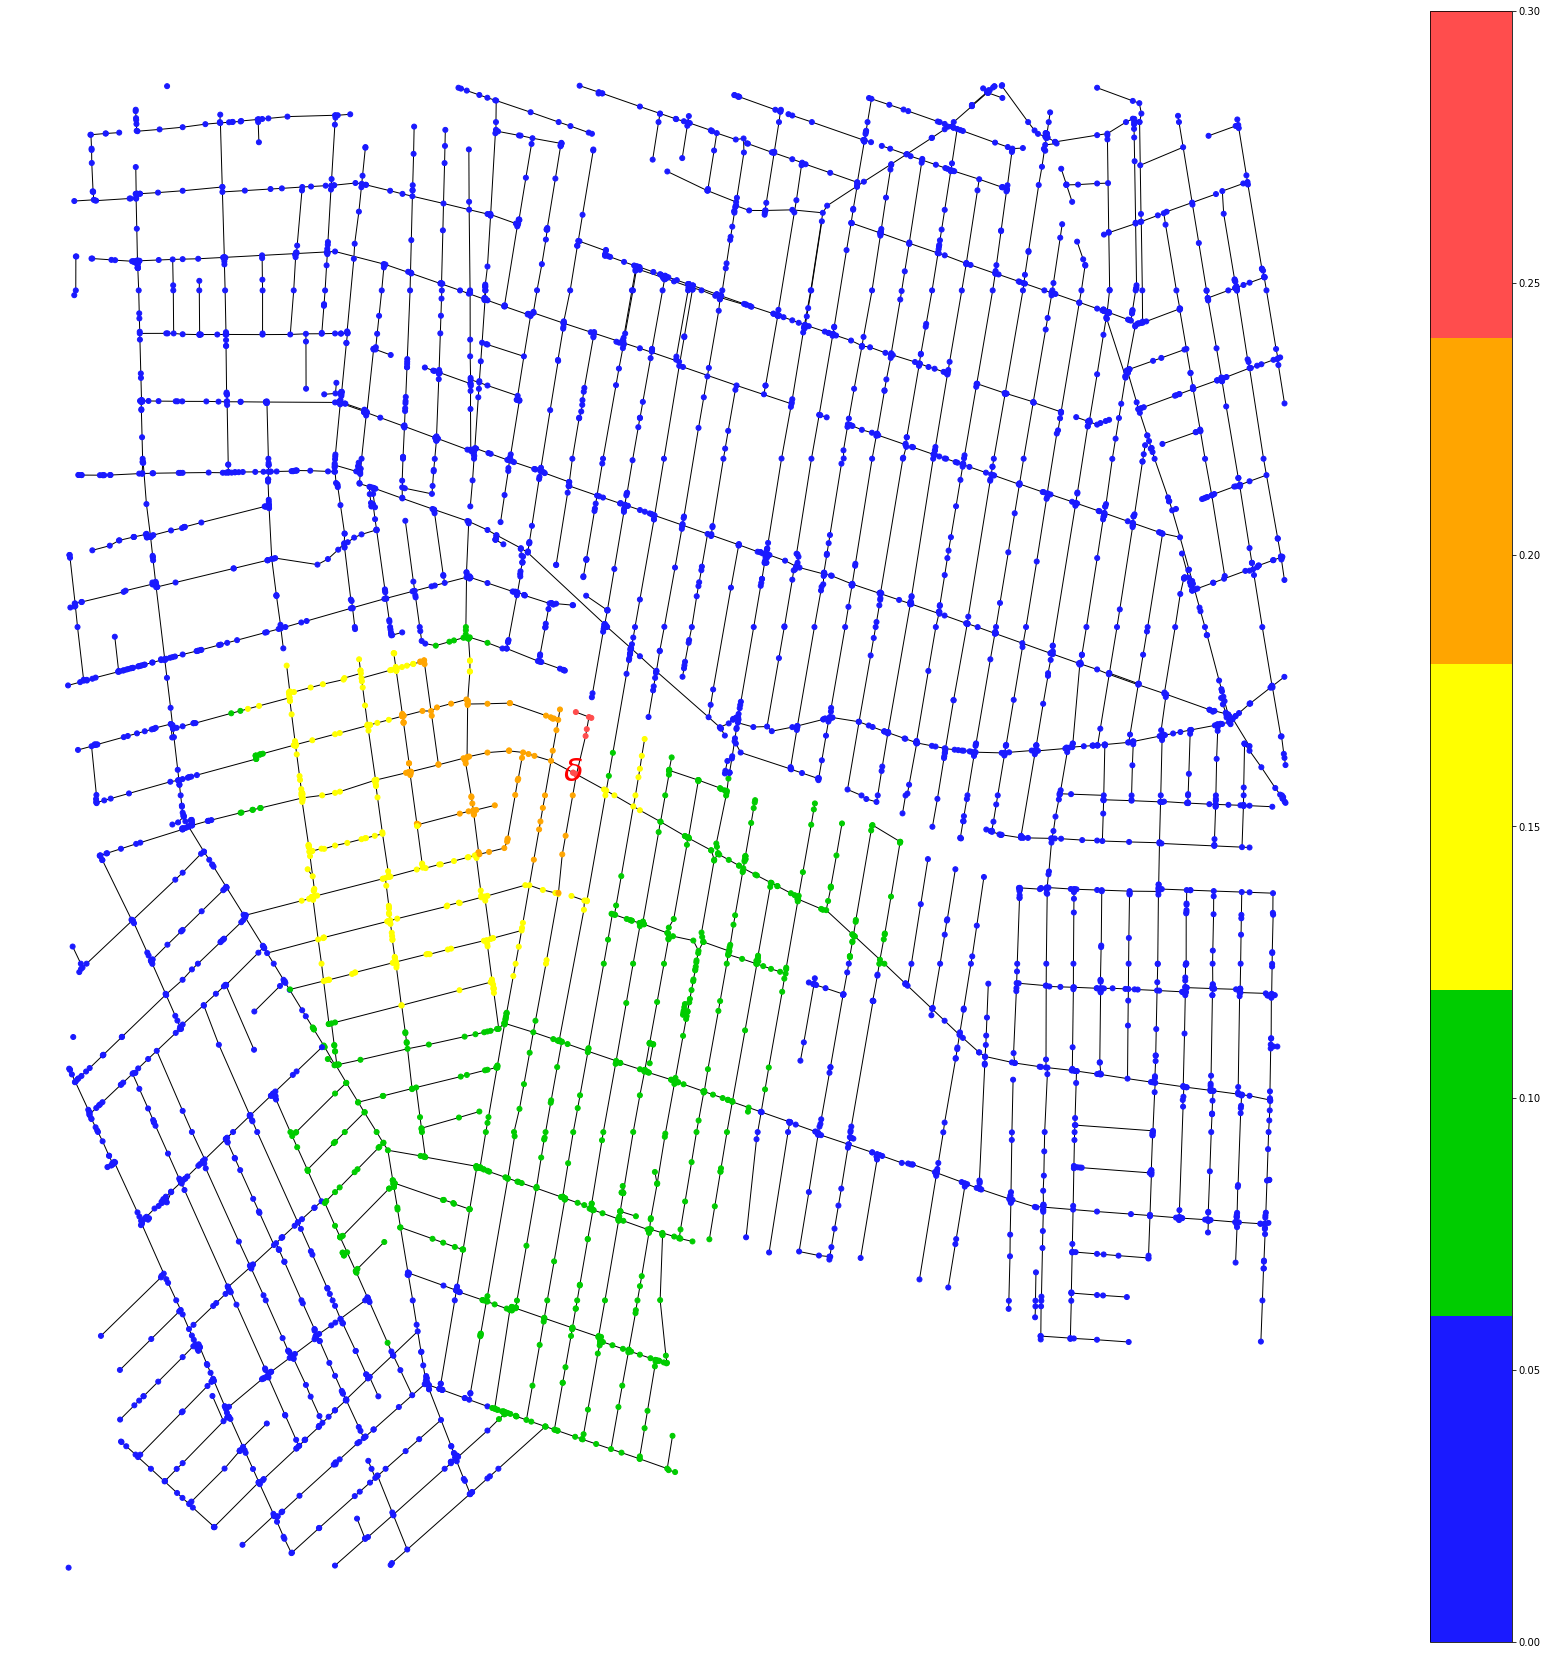

0.25716027973630223

In [53]:
draw_graph(res0_41)
res0_41.iloc[1786]['PressureDeviation']

In [38]:
res0_41.iloc[1784]['NodePressure']
min(res0_41.NodePressure)

4.625812000000001

In [85]:
#############
#refer to https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
##############

import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D

matplotlib_axes_logger.setLevel('ERROR')

def draw_3d(graphArr):

    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    d3pos_dict = defaultdict(list)
    for d in (pos_dict0, nodepressure_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    def network_plot_3D(G, angle, save=True):
        
        lower = 0.0
        upper = 0.3
        colors = plt.cm.jet((graphArr.PressureDeviation-lower)/(upper-lower))
        
        tp2 = (graphArr.PressureDeviation-lower)/(upper-lower)
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Pressure Deviation', fontsize=30)
            ax.set_zlim(0.0,0.3)


            # Loop on the pos dictionary to extract the x,y,z coordinates of each node
            ctr=0
            for key, value in d3pos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                # Scatter plot
                ax.scatter(xi, yi, zi,c=cc[ctr], edgecolors='k', alpha=0.5, s=80)
                ctr=ctr+1

            # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
            # Those two points are the extrema of the line to be plotted
            for i,j in enumerate(G.edges()):
                x = np.array((d3pos_dict0[j[0]][0][0], d3pos_dict0[j[1]][0][0]))
                y = np.array((d3pos_dict0[j[0]][0][1], d3pos_dict0[j[1]][0][1]))
                z = np.array((d3pos_dict0[j[0]][1], d3pos_dict0[j[1]][1]))

            # Plot the connecting lines
                ax.plot(x, y, z, c='black',alpha=0.5)

        # Set the initial view
        plt.rcParams.update({'font.size': 30})
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        # Hide the axes
        #ax.set_axis_off()

        if save is not False:
            plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/Leak_41_ZeroDegrees.png")
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [ ]:
draw_3d(res0_41)

In [ ]:
draw_graph(res0_1)
res0_1.iloc[1789]['FlowDeviation']

In [ ]:
draw_graph(res0_11)
res0_11.iloc[1789]['FlowDeviation']

In [ ]:
draw_graph(res0_21)
res0_21.iloc[1789]['FlowDeviation']

In [ ]:
draw_graph(res0_31)
res0_31.iloc[1789]['FlowDeviation']

In [ ]:
draw_graph(res0_41)
res0_41.iloc[1789]['FlowDeviation']

In [ ]:
max(res0_41['FlowDeviation'])

In [ ]:
max(res0_1['FlowDeviation'])

In [ ]:
max(res0_11['FlowDeviation'])

In [ ]:
max(res0_21['FlowDeviation'])

In [ ]:
max(res0_31['FlowDeviation'])

In [ ]:
max(res0_41['FlowDeviation'])

In [65]:
res0_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/data.csv')